## 📊 Task 3: Interactive Dashboard Development

The goal of this task is to create a dashboard application for stakeholders to interactively explore Brent oil price trends and understand the effects of geopolitical and economic events over time. The dashboard will integrate the following:

- Historical Brent oil price data (from 1987–2022)
- Statistically significant change points (from Bayesian model)
- Key global events (e.g., Gulf War, COVID-19)

The dashboard consists of:
- A Flask backend serving cleaned time series, change points, and event data
- A React frontend for displaying interactive visualizations

### 📥 Load Cleaned Brent Oil Data and Events

We load the following datasets:
- `brent_prices_cleaned.csv`: daily oil prices with dates and log returns
- `key_events.csv`: curated list of 10 major events with dates and descriptions
- `changepoints.json`: output from Bayesian change point detection (Task 2)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_prices = pd.read_csv("../data/brent_prices_cleaned.csv", parse_dates=["Date"])
df_events = pd.read_csv("../data/key_events.csv", parse_dates=["start_date"])
df_cp = pd.read_json("../data/changepoints.json")

# Preview
df_prices.head(), df_events.head(), df_cp.head()


(        Date  Price
 0 1987-05-20  18.63
 1 1987-05-21  18.45
 2 1987-05-22  18.55
 3 1987-05-25  18.60
 4 1987-05-26  18.63,
          event_name start_date                description
 0        Gulf War I 1990-08-02        Iraq invades Kuwait
 1       9/11 Attack 2001-09-11   Terrorist attack in U.S.
 2          Iraq War 2003-03-20          U.S. invades Iraq
 3  Financial Crisis 2008-09-15  Global financial collapse
 4       Arab Spring 2011-01-01         Middle East unrest,
    tau_index       Date
 0       5221 2007-11-23)

### 📈 Visualize Brent Oil Price with Key Events and Change Points

This visualization overlays:
- Brent oil price over time
- Change points (vertical red lines)
- Event annotations (orange dashed lines with labels)

This plot provides visual intuition into when structural changes occurred and how they align with real-world events.


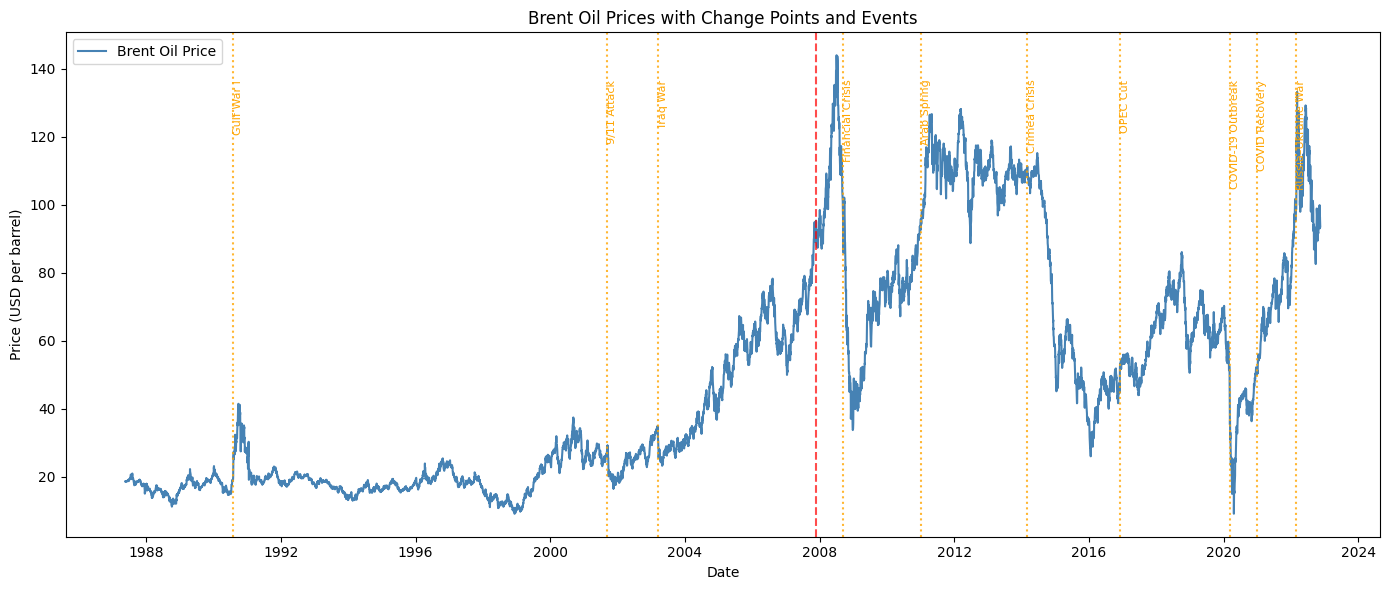

In [2]:
plt.figure(figsize=(14, 6))
plt.plot(df_prices['Date'], df_prices['Price'], label='Brent Oil Price', color='steelblue')

# Overlay change points
for cp in df_cp['Date']:
    plt.axvline(pd.to_datetime(cp), color='red', linestyle='--', alpha=0.7)

# Overlay event dates
for i, row in df_events.iterrows():
    plt.axvline(row['start_date'], color='orange', linestyle=':', alpha=0.8)
    plt.text(row['start_date'], df_prices['Price'].max() * 0.95, row['event_name'],
             rotation=90, verticalalignment='top', fontsize=8, color='orange')

plt.title("Brent Oil Prices with Change Points and Events")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.legend()
plt.tight_layout()
plt.show()


### 🛠️ Prepare Data for Flask Backend

We prepare three dataframes to be served as API endpoints in the backend:

- `/api/prices` → Full Brent oil price dataset
- `/api/events` → Curated key events
- `/api/changepoints` → Detected change points

These will be served in JSON format to the frontend.


In [4]:
# Export data to be used in the backend
df_prices.to_json("../dashboard/backend/data/prices.json", orient="records", date_format="iso")
df_events.to_json("../dashboard/backend/data/events.json", orient="records", date_format="iso")
df_cp.to_json("../dashboard/backend/data/changepoints.json", orient="records", date_format="iso")
